In [1]:
import numpy as np
import pandas as pd
from radioReduction import *
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as op
import random


In [4]:
dt = pd.read_table('1314/dataTables/2M1314e3-LLRR.dat')
binned = binning(dt,sec=10)

def binPlot(Type='sec'):
    if Type == 'minutes':
        plt.errorbar(binned['dtmin'],binned['re'],yerr=binned['ure'],linestyle='None',color='k',label='_nolegend_')
        plt.scatter(binned['dtmin'],binned['re'],color='black',label='Data')
    else:
        plt.errorbar(binned['secs'],binned['re'],yerr=binned['ure'],linestyle='None',color='k',label='_nolegend_')
        plt.scatter(binned['secs'],binned['re'],color='black',label='Data') 
        

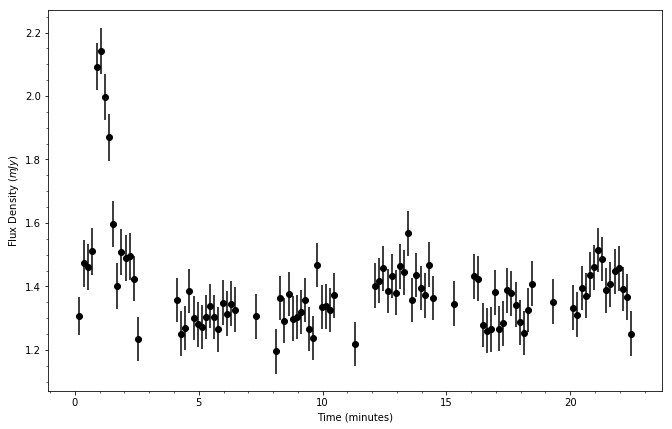

In [26]:
plt.figure(figsize=(11,7))
binPlot('minutes')
plt.xlabel('Time (minutes)')
plt.ylabel('Flux Density ($mJy$)')
plt.minorticks_on()
plt.savefig('plots/2M1314Flare.png')
plt.show()

In [9]:
rr = pd.read_table('1314/dataTables/2M1314e3-RR.dat')
ll = pd.read_table('1314/dataTables/2M1314e3-LL.dat')


rr = binning(rr,10)
ll = binning(ll,10)


/home/russell/projects/radio_project/radioReduction.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['secs'] = data['dtmin']*60


In [10]:
stI = (rr['re']+ll['re'])*.5
stV = (rr['re']-ll['re'])*.5
frac = stV/stI
stErr = np.sqrt(rr['ure']**2+ll['ure']**2)*.5
time = rr['dtmin']

In [39]:
print(np.max(stI))

2.1428304383267367


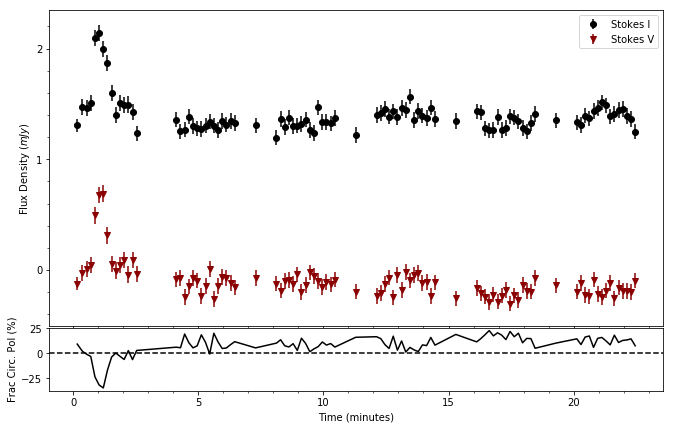

In [12]:
fig,ax = plt.subplots(figsize=(11,7),nrows=2,ncols=1,sharex=True,gridspec_kw = {'hspace':.01,'height_ratios':[5,1]})
ax[0].errorbar(time,stI,yerr=stErr,color='k',fmt='o',linestyle='None',label='Stokes I')
ax[0].errorbar(time,-stV,yerr=stErr,color='darkred',fmt='v',linestyle='None',label='Stokes V')
#ax[0].axhline(y=0,color='k',linestyle='dashed')
ax[0].legend(loc='best')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].locator_params(axis='y',nbins=4)
ax[0].minorticks_on()
ax[1].plot(time,100*frac,color='k')
ax[1].axhline(y=0,color='k',linestyle='dashed')
ax[1].set_ylabel('Frac Circ. Pol (%)')
plt.xlabel('Time (minutes)')
#plt.savefig('plots/1314e3_Stokes.png')
plt.show()

In [14]:
nonFlaring = np.median(stI + stV)
flaring = stI - nonFlaring

print(nonFlaring)

1.4860090861363404


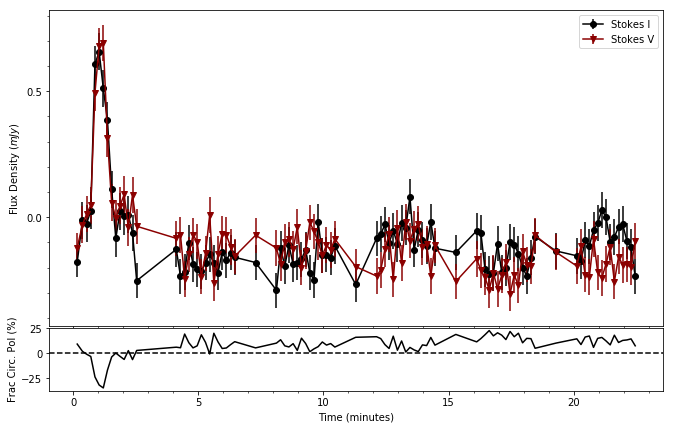

In [40]:
fig,ax = plt.subplots(figsize=(11,7),nrows=2,ncols=1,sharex=True,gridspec_kw = {'hspace':.01,'height_ratios':[5,1]})
ax[0].errorbar(time,flaring,yerr=stErr,color='k',fmt='o',linestyle='-',label='Stokes I')
ax[0].errorbar(time,-stV,yerr=stErr,color='darkred',fmt='v',linestyle='-',label='Stokes V')
#ax[0].axhline(y=0,color='k',linestyle='dashed')
ax[0].legend(loc='best')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].locator_params(axis='y',nbins=4)
ax[0].minorticks_on()
ax[1].plot(time,100*frac,color='k')
ax[1].axhline(y=0,color='k',linestyle='dashed')
ax[1].set_ylabel('Frac Circ. Pol (%)')
plt.xlabel('Time (minutes)')
#plt.savefig('plots/1314e3_Stokes.png')
plt.show()

In [20]:
low = pd.read_table('1314/dataTables/2M1314e3-5GHz.dat')
high = pd.read_table('1314/dataTables/2M1314e3-7GHz.dat')

low = low[low['nsamp']>500]
high = high[high['nsamp']>500]

low = binning(low,10)
high = binning(high,10)


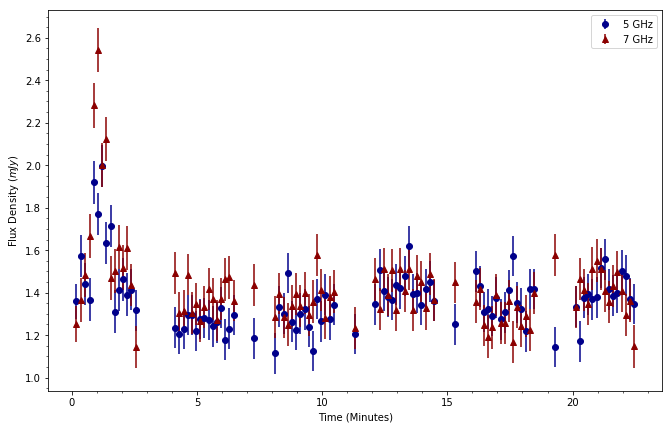

In [38]:
plt.figure(figsize=(11,7))
plt.errorbar(low['dtmin'],low['re'],yerr=low['ure'],color='darkblue',fmt='o',linestyle='None',label='5 GHz')
plt.errorbar(high['dtmin'],high['re'],yerr=high['ure'],color='darkred',fmt='^',linestyle='None',label='7 GHz')
plt.legend(loc='best')
plt.minorticks_on()
plt.xlabel('Time (Minutes)')
plt.ylabel('Flux Density ($mJy$)')
plt.savefig('plots/2M1314Flare_SED.png')
plt.show()

In [3]:
'''
Looking at the dynamic spectrum
'''
from pwkit.environments.casa import dftdynspec as ds
from pwkit.environments.casa.dftdynspec import Loader

path = '1314/2M1314e3_dynspec.dat'
ds = Loader(path)

Text(0.5, 0, 'Frequency')

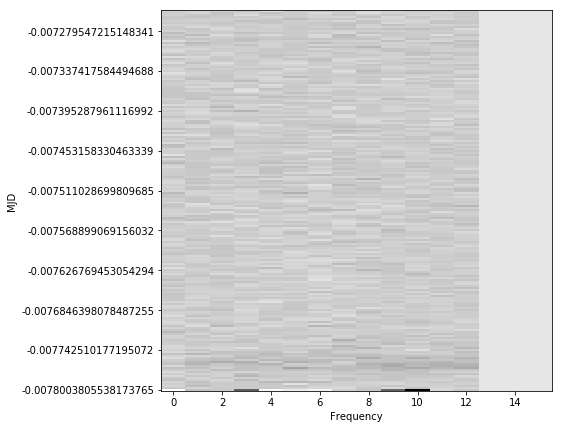

In [8]:
ticks = np.arange(0,ds.mjds.shape[0],20) # makes ticks

plt.figure(figsize=(7,7))
plt.yticks(ticks,labels=ds.mjds-np.mean(ds.mjds))
plt.imshow(ds.reals,aspect='auto',origin='lower',cmap='Greys')
plt.ylabel('MJD')
plt.xlabel('Frequency')